In [261]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier


import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore')

In [262]:
file_path = 'pokemon.csv'
df = pd.read_csv(file_path, index_col=False, low_memory=False,)

# EDA

In [263]:
df

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

In [264]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


(   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
 0  1              Bulbasaur  Grass  Poison    318  45      49       49   
 1  2                Ivysaur  Grass  Poison    405  60      62       63   
 2  3               Venusaur  Grass  Poison    525  80      82       83   
 3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
 4  4             Charmander   Fire     NaN    309  39      52       43   
 
    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
 0       65       65     45           1      False  
 1       80       80     60           1      False  
 2      100      100     80           1      False  
 3      122      120     80           1      False  
 4       60       50     65           1      False  ,
 None)

In [265]:
df.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

### Počet záznamů (Count)
Pro každý atribut je k dispozici 800 hodnot, což znamená, že dataset obsahuje informace o 800 Pokémonech.

### Průměrné hodnoty (Mean):
Celková síla Pokémonů je v průměru 362.81.
Průměrné HP (životy) je 69.26, útok 79.00, obrana 73.84, speciální útok 72.82, speciální obrana 71.90 a rychlost 68.28.
Průměrná generace je 3.32, což naznačuje, že většina Pokémonů pochází z prvních tří generací.

### Rozptyl hodnot (Směrodatná odchylka - Std):
Největší rozptyl je vidět u celkové statistiky (208.34), což značí, že výkon Pokémonů se výrazně liší.
Ostatní vlastnosti, jako útok a obrana, mají menší rozptyl, což naznačuje, že jejich hodnoty jsou v datasetu konzistentnější.

### Minimální hodnoty (Min):
Pokémon s nejnižším celkovým skóre má hodnotu 180.
Nejnižší hodnota HP je 1, rychlosti 5, což značí slabé Pokémony v těchto kategoriích.

### Kvartily (25%, 50%, 75%):
25 % Pokémonů má celkové statistiky pod 330, což značí spíše slabší Pokémony.
Medián celkových statistik je 450, což ukazuje na rovnoměrné rozložení silných a slabších Pokémonů.
75 % Pokémonů má celkové statistiky pod 515, takže pouze 25 % Pokémonů je výrazně silnějších.

### Maximální hodnoty (Max):
Nejlepší Pokémon má celkovou hodnotu 780.
Rychlost, útok a speciální útok dosahují maximálně 230, což odpovídá nejsilnějším Pokémonům v těchto kategoriích.

### Shrnutí:
Tabulka ukazuje velkou variabilitu v silách Pokémonů. Většina Pokémonů má průměrné statistiky kolem 362.81 bodů, ale mezi nimi jsou i výrazně slabší a silnější Pokémoni. Největší rozdíly jsou patrné v celkových statistikách, rychlosti a speciálním útoku.

## Druhy pokémonů
Obsahuje 18 různých typů Pokémonů. Každý pokémon má alespoň jeden typ, nektěří Pokémonové mají i 2. typ, který upřesňuje jeho vlastnosti. Například pokud 1. typ je "Dragon", 2. typ může být například "Dark" nebo "Fire". Pokud 2. typ nemá, je u pokémona záznam "nan"

In [266]:
df['Type 1'].unique()
# len(df['Type 1'].unique()) = 18

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [267]:
df['Type 2'].unique()
# len(df['Type 2'].unique()) = 19

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

## Kontrola chybějících hodnot

Zde můžeme vidět, že 386 pokémonů nemá druhý typ.

In [268]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## Kontrola zduplikovaných hodnot

Žádný Pokémon se zde nevyskytuje vícekrát.

In [269]:
df.duplicated().sum()

np.int64(0)

## Datové typy

In [270]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

|Atribut|	Datový typ|Popis|
| --------      | -------    |-------        |
| hashtag| int64 | Unikátní ID každého Pokémona |
|Name|	object |Jméno každého Pokémona|
|Type 1|	object|Hlavní typ Pokémona, který určuje jeho |slabosti/odolnosti vůči útokům|
|Type 2| object |	Druhý typ (pokud má Pokémon dvojí typ)|
| Total	| int64 |Součet všech statistik uvedených níže, obecný ukazatel síly Pokémona|
| HP	| int64|Počet životů (hit points), určuje, kolik poškození Pokémon snese, než omdlí|
|Attack	|int64|Základní hodnota pro běžné útoky (např. Škrábnutí, Úder)
|Defense	|int64|Základní odolnost proti běžným útokům
|SP Atk|int64	|Speciální útok, základní hodnota pro speciální útoky (např. Ohnivý výbuch, Vodní dělo)
|SP Def	|int64|Základní odolnost proti speciálním útokům
|Speed	|int64|Rychlost, určuje, který Pokémon zaútočí první v každém kole
| Generation |int64| Generace, ve které byl Pokémon představen (např. 1 = první generace, 2 = druhá generace)|
| Legendary | bool | určuje, zda je Pokémon legendární (vzácný)


## Zjištění unikátních hodnot

V datasetu se vyskytují pokémoni z 6 generací, z nichž 65 je legendárních.

Zajímavostí je, že počet ID neodpovídá počtu názvů Pokémonů. To je způsobeno tím, že někteří pokémoni mají například různé velikosti (viz. tabulka). Pro shlukování jsou atributy jméno a ID irelevantní a budou v pre-processingu smazány.

| ID  | Name                     | Type 1 | Type 2 | Total | HP | Attack | Defense | Sp. Atk | Sp. Def | Speed | Generation | Legendary |
|-----|--------------------------|--------|--------|-------|----|--------|---------|---------|---------|-------|------------|-----------|
| 710 | PumpkabooAverage Size    | Ghost  | Grass  | 335   | 49 | 66     | 70      | 44      | 55      | 51    | 6          | False     |
| 710 | PumpkabooSmall Size      | Ghost  | Grass  | 335   | 44 | 66     | 70      | 44      | 55      | 56    | 6          | False     |
| 710 | PumpkabooLarge Size      | Ghost  | Grass  | 335   | 54 | 66     | 70      | 44      | 55      | 46    | 6          | False     |
| 710 | PumpkabooSuper Size      | Ghost  | Grass  | 335   | 59 | 66     | 70      | 44      | 55      | 41    | 6          | False     |


In [271]:
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

## Legendární Pokémoni

Zajímavým atributem, který pro mě osobně na první pohled vyčnívá je atribut 'Legendary'.

In [272]:
legendary_pokemons = df[df['Legendary'] == True]
legendary_pokemons

#                 Name    Type 1    Type 2  Total   HP  Attack  \
156  144             Articuno       Ice    Flying    580   90      85   
157  145               Zapdos  Electric    Flying    580   90      90   
158  146              Moltres      Fire    Flying    580   90     100   
162  150               Mewtwo   Psychic       NaN    680  106     110   
163  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   
..   ...                  ...       ...       ...    ...  ...     ...   
795  719              Diancie      Rock     Fairy    600   50     100   
796  719  DiancieMega Diancie      Rock     Fairy    700   50     160   
797  720  HoopaHoopa Confined   Psychic     Ghost    600   80     110   
798  720   HoopaHoopa Unbound   Psychic      Dark    680   80     160   
799  721            Volcanion      Fire     Water    600   80     110   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
156      100       95      125     85           1       True  
157       85      125       90    100           1       True  
158       90      125       85     90           1       True  
162       90      154       90    130           1       True  
163      100      154      100    130           1       True  
..       ...      ...      ...    ...         ...        ...  
795      150      100      150     50           6       True  
796      110      160      110    110           6       True  
797       60      150      130     70           6       True  
798       60      170      130     80           6       True  
799      120      130       90     70           6       True  

[65 rows x 13 columns]

In [273]:
alt.Chart(legendary_pokemons).mark_circle().encode(
    x='Total',
    y='HP',
    color='Type 1',
    tooltip=['Name', 'Type 1', 'Type 2', 'Total', 'HP']
).interactive()

alt.Chart(...)

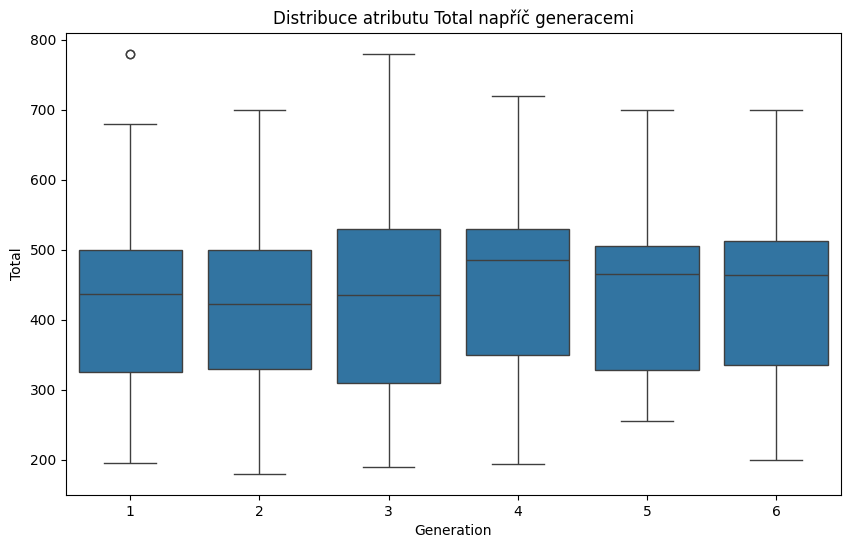

In [274]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Generation', y='Total', data=df)
plt.xlabel('Generation')
plt.ylabel('Total')
_ = plt.title('Distribuce atributu Total napříč generacemi')

Z krabicových grafů můžeme pozorovat celkem rovnoměrné rozdělení Pokémonů do generací.
Lze zde pozorovat hned 3 zajímavosti:

1) Outlier v první generaci (Pokémon, který spadá do první generace a je velmi silný).

2) 3. generace má velký rozsah celkové síly Pokémonů.

3) Mediány pro 4,5 a 6 generaci jsou podobné.

## Popis numerických atributů

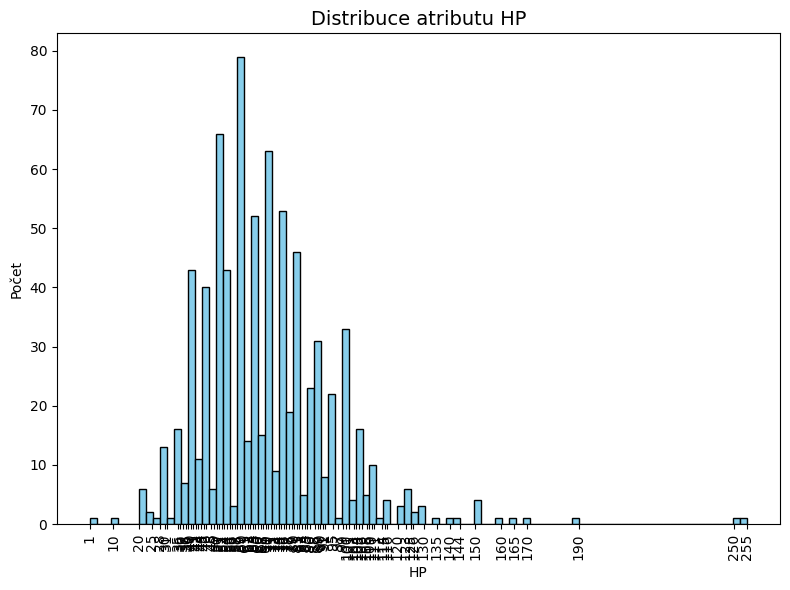

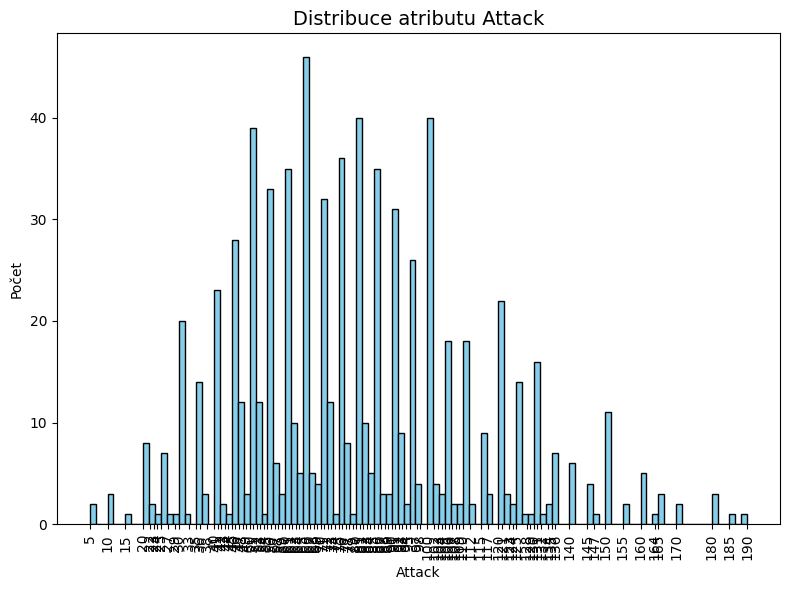

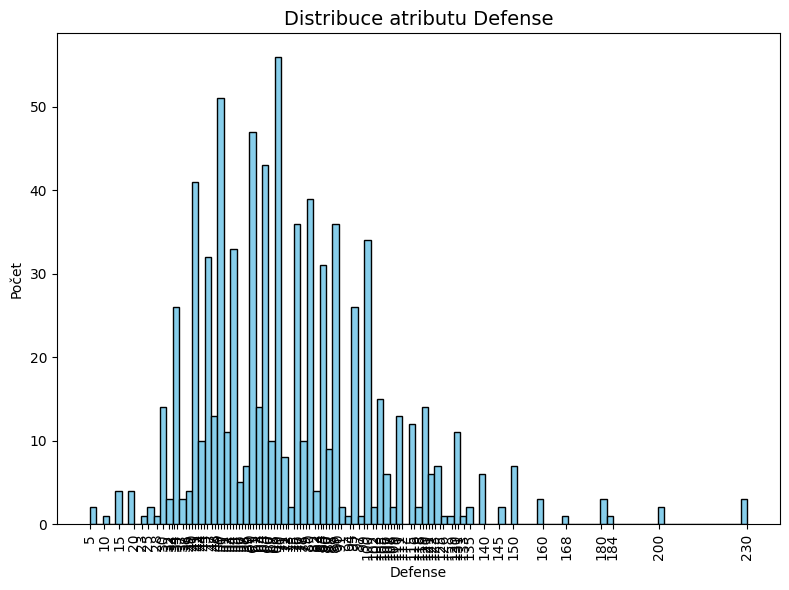

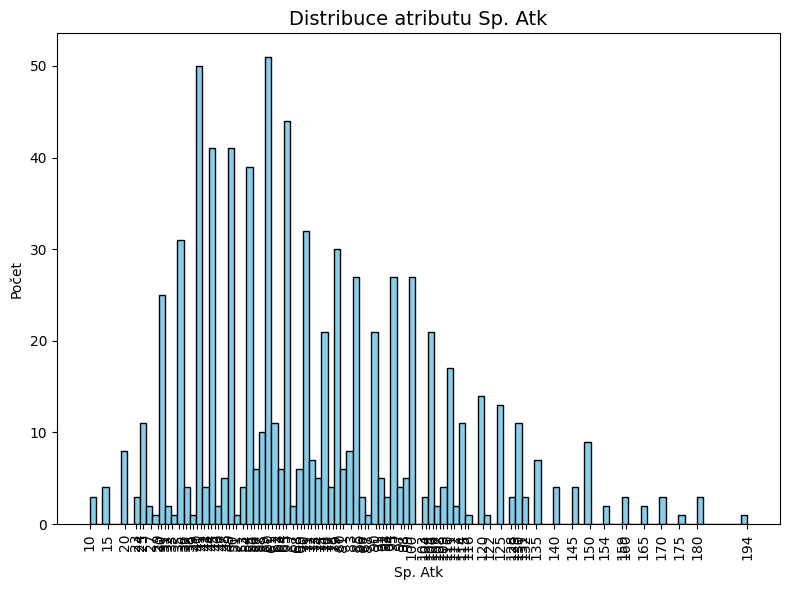

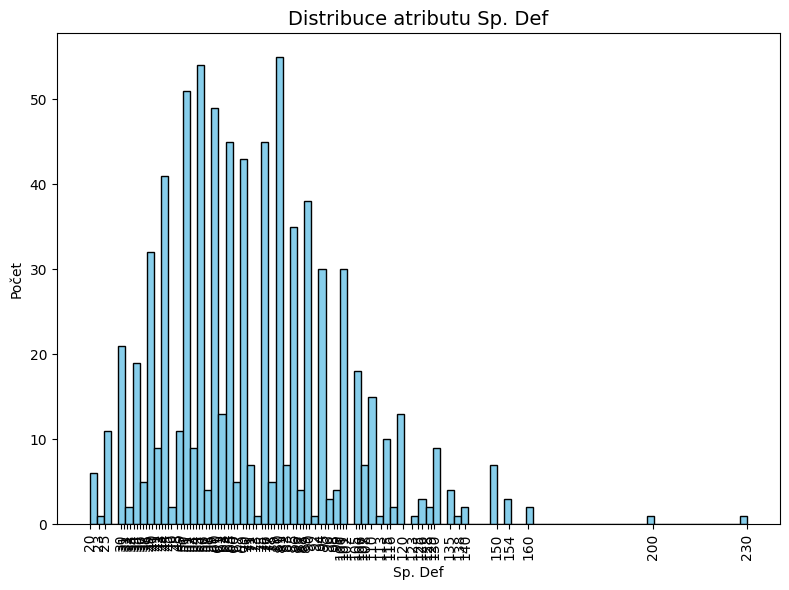

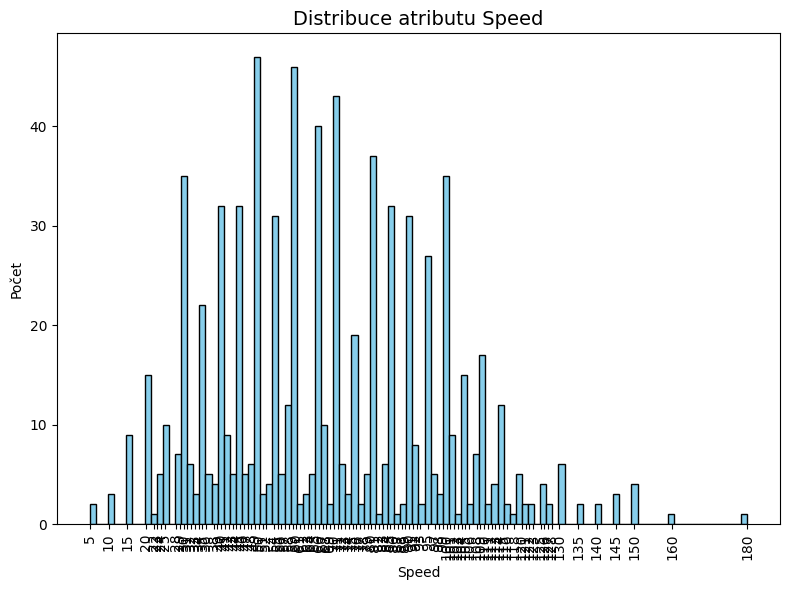

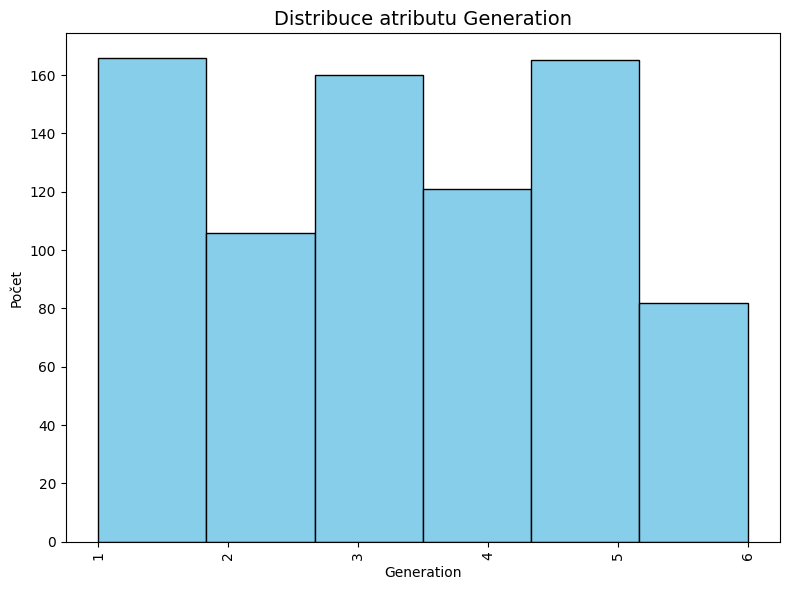

In [275]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(8, 6))
  data = df[attribute].dropna()
  plt.hist(data, bins=len(data.unique()), color='skyblue', edgecolor='black', align='mid')

  plt.xticks(sorted(data.unique()), rotation=90)
  plt.title(f'Distribuce atributu {attribute}', fontsize=14)
  plt.xlabel(f'{attribute}')
  plt.ylabel('Počet')

  plt.tight_layout()
  plt.show()


### Popis
Číselné atributy 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation' mají normální rozdělení. Úsudek o typu rozdělení nám udává, který typ scaleru použijeme. V tomto případě pro všechny atributy použijeme StandardScaler.

Jediná výjimka je atribut 'Generation', který má rovnoměrné rozdělení.
Z toho vyplývá, že autoři vytvářeli pro každou generaci cca stejný počet Pokémonů. Jediná výjimka co lze z grafu vyčíst je generace 6, kde autorům asi docházely nápady. ;)

## Popis kategoriálních atributů

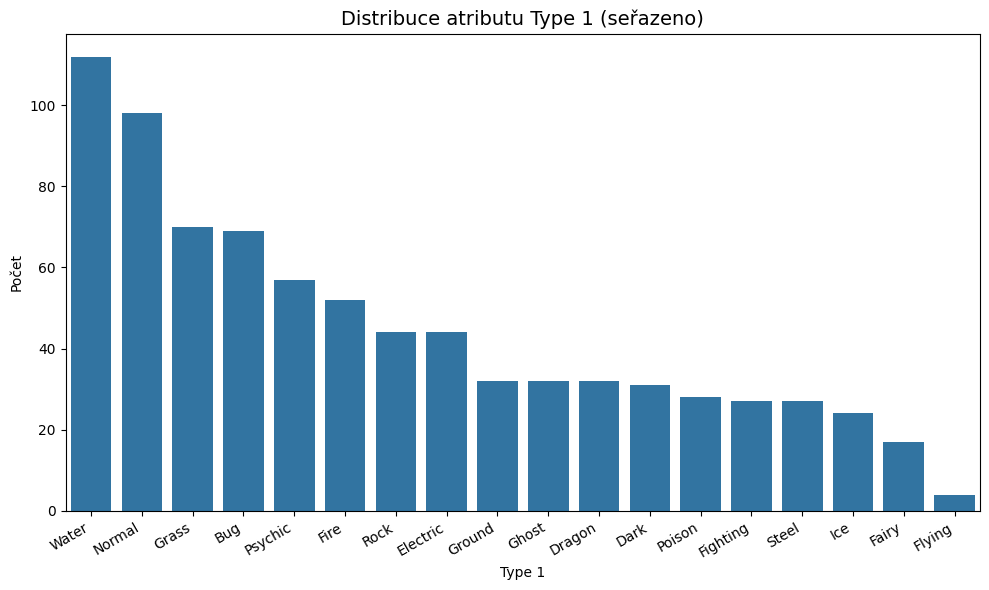

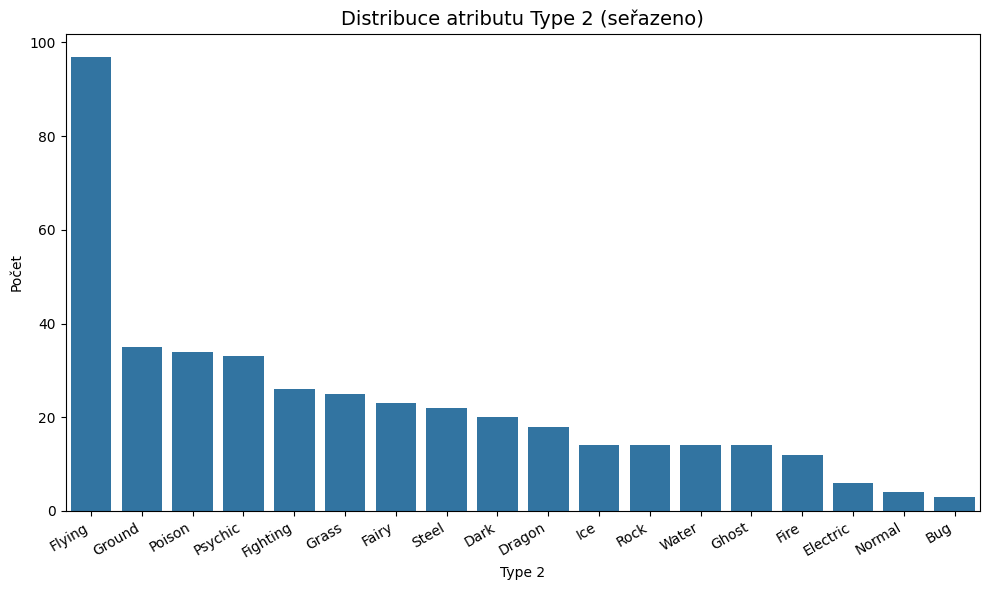

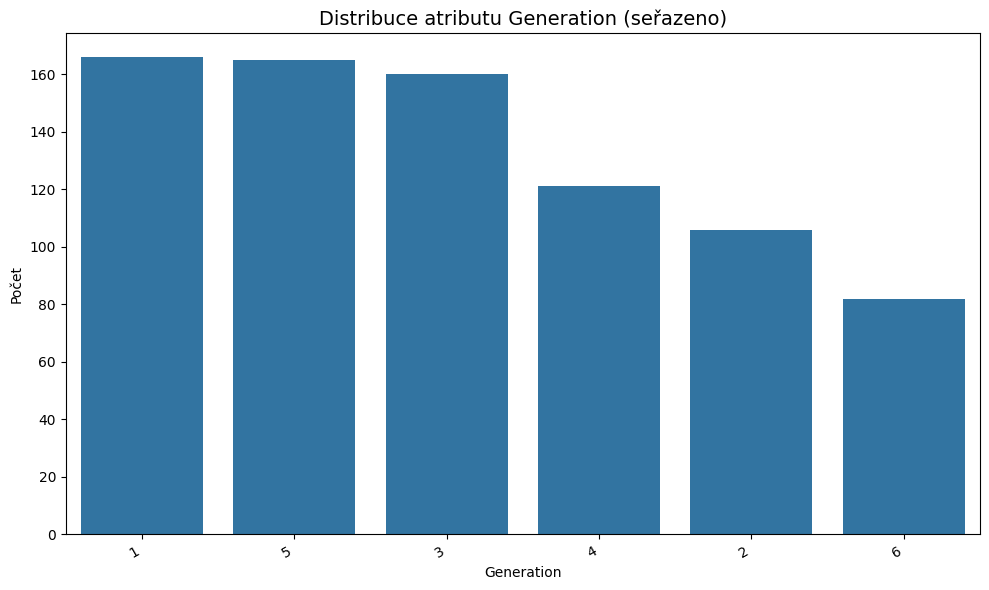

In [276]:
attributes = ['Type 1', 'Type 2', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(10, 6))
  plt.ylabel('Počet')
  plt.title(f'Distribuce atributu {attribute} (seřazeno)', fontsize=14)
  plt.xlabel(f'{attribute}')
  sns.countplot(data=df, x=attribute, order=df[attribute].value_counts().index)
  plt.xticks(rotation=30, ha='right')
  plt.tight_layout()
  plt.show()

### Popis
Největší zastoupení u 'Type 1' mají: Water, Normal, Grass a naopak nejmenší zastoupení mají Flying, Fairy, Ice

Největší zastoupení u 'Type 2' mají: Flying, Ground, Poison a naopak nejmenší zastoupení mají Bug, Normal, Electric



## Korelační matice pro numerické hodnoty

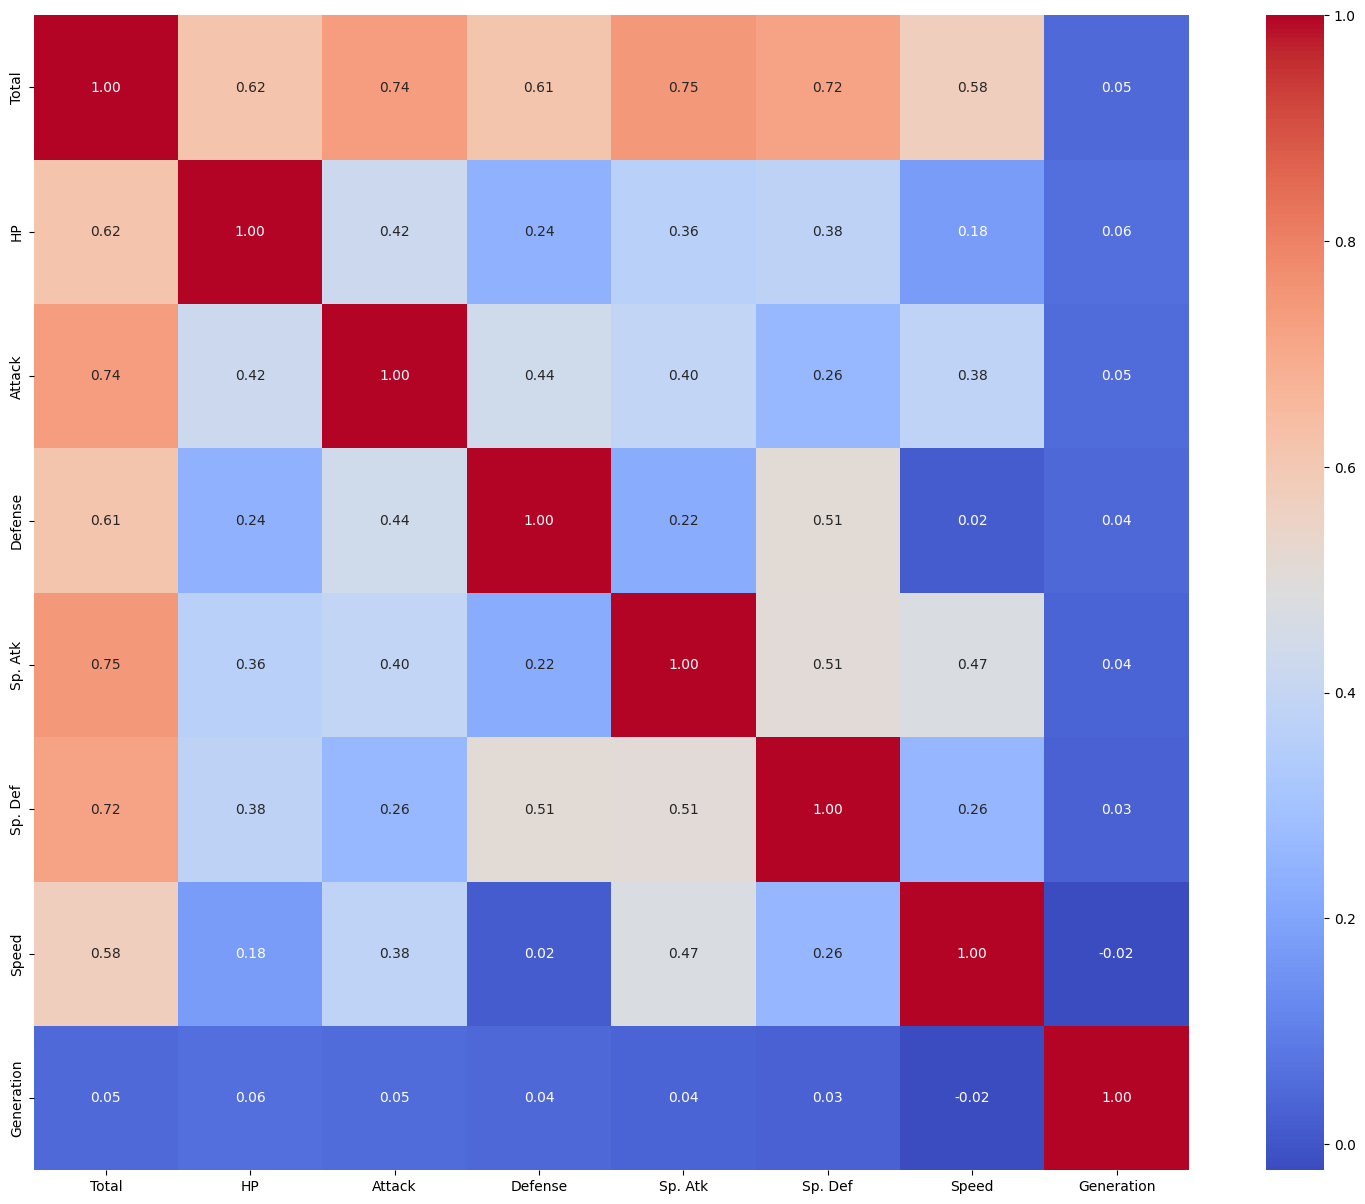

In [277]:
numeric_df = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
corr_mat = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, cmap='coolwarm', square=True, annot=True, fmt='.2f')
plt.show()

### Popis
Celková statistika Pokémonů je silně ovlivněna útokem, speciálním útokem a speciální obranou.
Obranné statistiky (obrana a speciální obrana) jsou navzájem pozitivně korelované, ale nemají téměř žádný vztah k rychlosti.
Generace Pokémonů nemá významnou korelaci s ostatními vlastnostmi.
Pokémoni s vysokým HP často nemají silnou rychlost ani obranu.
Tato korelační matice je užitečná pro pochopení vztahů mezi různými atributy Pokémonů a může pomoci při analýze nebo predikci jejich výkonu.

# Pre-processing

Z EDA plyne zjištění, že atributy "#" a "Name" nejsou důležité pro následující zpracování dat.

In [278]:
df_scaled= df.drop(['#', 'Name'], axis=1)

Atributy 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' mají normální rozdělení, proto bude v pre-processing části použit StandardScaler

In [279]:
standard_scaler = StandardScaler()
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for attribute in attributes:
  df_scaled[attribute] = standard_scaler.fit_transform(df[[attribute]])

Atributy "Type 1" a "Type 2" lze převést pomocí One-Hot Encoding každý typ na samostatný binární atribut. Tím v dalších krocích modelům umožníme pracovat s tímto atributem jako s kategorií.

In [280]:
pokemon_data = df_scaled

# One-Hot Encoding
type1_encoded = pd.get_dummies(pokemon_data['Type 1'], prefix='Type1')
type2_encoded = pd.get_dummies(pokemon_data['Type 2'], prefix='Type2')

pokemon_data_encoded = pd.concat([pokemon_data, type1_encoded, type2_encoded], axis=1)
pokemon_data_encoded.drop(['Generation', 'Type 1', 'Type 2'], axis=1, inplace=True)

df_scaled = pokemon_data_encoded

# Klasifikace "Legendary"

V této části se zaměříme na predikci atributu "Legendary". K predikci tohoto atributu jsem zvolil následující algoritmy:
#### Decision Tree:
Je vhodný pro data s kategoriálními proměnnými
Snadno vysvětlitelný model, který poskytuje jasné pravidla (např. pokud je "Type 1" = Grass a "HP" > 50, pak...).
Rychlá implementace na menších datových sadách, jako je tato (800 záznamů).

#### Random Forest
Redukuje riziko přetrénování ve srovnání s jednotlivým rozhodovacím stromem.
Vhodný pro predikce na základě kombinace více číselných i kategoriálních atributů (např. Total, Speed a Type 1).
Robustní vůči šumu a chybám, například při zpracování chybějících hodnot v "Type 2".

#### Logistic Regression
Ideální pro binární klasifikaci, což se skvěle hodí na predikci atributu "Legendary"
Snadno interpretovatelný model, který ukazuje přímý vztah mezi nezávislými proměnnými (např. Total, Speed) a cílovou proměnnou.
Funguje dobře u lineárně separovatelných dat.

#### Gradient Boosting
Výkonný model pro složitější vztahy v datech.
Využití atributů jako "HP", "Attack", "Speed" a jejich interakcí pro predikce.

## 1. Klasifikace (DecisionTree)

In [281]:
X = df_scaled.drop('Legendary', axis=1)
y = df_scaled['Legendary']  # Target variable

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

clf = DecisionTreeClassifier(random_state=42)

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

initial_scores = cross_val_score(clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default DecisionTree - Average F1 score: {initial_scores.mean():.4f}")
print(f"Default DecisionTree - Best F1 score: {initial_scores.max():.4f}")

# hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='f1', n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_
print(f"Tuned DecisionTree - Best hyperparameters: {best_params}")
print(f"Tuned DecisionTree - Best cross-validation F1 score: {best_cv_score:.4f}")

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
test_f1 = f1_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Tuned DecisionTree - F1 score on test data: {test_f1:.4f}")
print(f"Tuned DecisionTree - Accuracy on test data: {test_accuracy:.4f}")
print("Classification report:\n")
print(classification_report(y_test, y_pred))

Default DecisionTree - Average F1 score: 0.7165
Default DecisionTree - Best F1 score: 0.8000
Tuned DecisionTree - Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned DecisionTree - Best cross-validation F1 score: 0.7925
Tuned DecisionTree - F1 score on test data: 0.8421
Tuned DecisionTree - Accuracy on test data: 0.9812
Classification report:

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       150
        True       0.89      0.80      0.84        10

    accuracy                           0.98       160
   macro avg       0.94      0.90      0.92       160
weighted avg       0.98      0.98      0.98       160



## 2. Klasifikace (RandomForest)

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}


rf_clf = RandomForestClassifier(random_state=42)

# cross-validation
rf_initial_scores = cross_val_score(rf_clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default RandomForest - Average F1 score: {rf_initial_scores.mean():.4f}")
print(f"Default RandomForest - Best F1 score: {rf_initial_scores.max():.4f}")

# hyperparameter tuning
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=kf, scoring='f1', n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_cv_score = rf_grid_search.best_score_
print(f"Tuned RandomForest - Best hyperparameters: {rf_best_params}")
print(f"Tuned RandomForest - Best cross-validation F1 score: {rf_best_cv_score:.4f}") # TODO: lepší dělat mean

rf_best_clf = rf_grid_search.best_estimator_
rf_y_pred = rf_best_clf.predict(X_test)
rf_test_f1 = f1_score(y_test, rf_y_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)

print(f"Tuned RandomForest - F1 score on test data: {rf_test_f1:.4f}")
print(f"Tuned RandomForest - Accuracy on test data: {rf_test_accuracy:.4f}")
print("RandomForest Classification report:\n")
print(classification_report(y_test, rf_y_pred))


Default RandomForest - Average F1 score: 0.6272
Default RandomForest - Best F1 score: 0.6667
Tuned RandomForest - Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RandomForest - Best cross-validation F1 score: 0.7694
Tuned RandomForest - F1 score on test data: 0.6364
Tuned RandomForest - Accuracy on test data: 0.9500
RandomForest Classification report:

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       150
        True       0.58      0.70      0.64        10

    accuracy                           0.95       160
   macro avg       0.78      0.83      0.80       160
weighted avg       0.95      0.95      0.95       160



In [283]:
"""
Default RandomForest - Average F1 score: 0.6272
Default RandomForest - Best F1 score: 0.6667
Tuned RandomForest - Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RandomForest - Best cross-validation F1 score: 0.7694
Tuned RandomForest - F1 score on test data: 0.6364
Tuned RandomForest - Accuracy on test data: 0.9500
"""

"\nDefault RandomForest - Average F1 score: 0.6272\nDefault RandomForest - Best F1 score: 0.6667\nTuned RandomForest - Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}\nTuned RandomForest - Best cross-validation F1 score: 0.7694\nTuned RandomForest - F1 score on test data: 0.6364\nTuned RandomForest - Accuracy on test data: 0.9500\n"

## 3. Klasifikace (LogisticRegression)

In [ ]:
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}


lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_initial_scores = cross_val_score(lr_clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default LogisticRegression - Average F1 score: {lr_initial_scores.mean():.4f}")
print(f"Default LogisticRegression - Best F1 score: {lr_initial_scores.max():.4f}")

# hyperparameter tuning
lr_grid_search = GridSearchCV(estimator=lr_clf, param_grid=lr_param_grid, cv=kf, scoring='f1', verbose=1, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_grid_search.fit(X_train, y_train)

lr_best_params = lr_grid_search.best_params_
lr_best_cv_score = lr_grid_search.best_score_
print(f"Tuned LogisticRegression - Best hyperparameters: {lr_best_params}")
print(f"Tuned LogisticRegression - Best cross-validation F1 score: {lr_best_cv_score:.4f}") # TODO: lepší dělat mean


lr_best_clf = lr_grid_search.best_estimator_
lr_y_pred = lr_best_clf.predict(X_test)
lr_test_f1 = f1_score(y_test, lr_y_pred)
lr_test_accuracy = accuracy_score(y_test, lr_y_pred)

print(f"Tuned LogisticRegression - F1 score on test data: {lr_test_f1:.4f}")
print(f"Tuned LogisticRegression - Accuracy on test data: {lr_test_accuracy:.4f}")
print("LogisticRegression Classification report:\n")
print(classification_report(y_test, lr_y_pred))

Default LogisticRegression - Average F1 score: 0.5626
Default LogisticRegression - Best F1 score: 0.6667
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Tuned LogisticRegression - Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned LogisticRegression - Best cross-validation F1 score: 0.6472
Tuned LogisticRegression - F1 score on test data: 0.6957
Tuned LogisticRegression - Accuracy on test data: 0.9563
LogisticRegression Classification report:

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       150
        True       0.62      0.80      0.70        10

    accuracy                           0.96       160
   macro avg       0.80      0.88      0.84       160
weighted avg       0.96      0.96      0.96       160



## 4. Klasifikace Gradient Boosting

In [285]:
X = df_scaled.drop('Legendary', axis=1)
y = df_scaled['Legendary']  # Target variable

gb_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

gb_clf = GradientBoostingClassifier(random_state=42)
# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

gb_initial_scores = cross_val_score(gb_clf, X, y, cv=kf, scoring='f1', n_jobs=-1)
print(f"Default GradientBoosting - Average F1 score: {gb_initial_scores.mean():.4f}")
print(f"Default GradientBoosting - Best F1 score: {gb_initial_scores.max():.4f}")

# hyperparameter tuning
gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=kf, scoring='f1', verbose=1, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_grid_search.fit(X_train, y_train)

gb_best_params = gb_grid_search.best_params_
gb_best_cv_score = gb_grid_search.best_score_
print(f"Tuned GradientBoosting - Best hyperparameters: {gb_best_params}")
print(f"Tuned GradientBoosting - Best cross-validation F1 score: {gb_best_cv_score:.4f}") # TODO: lepší dělat mean

gb_best_clf = gb_grid_search.best_estimator_
gb_y_pred = gb_best_clf.predict(X_test)
gb_test_f1 = f1_score(y_test, gb_y_pred)
gb_test_accuracy = accuracy_score(y_test, gb_y_pred)

print(f"Tuned GradientBoosting - F1 score on test data: {gb_test_f1:.4f}")
print(f"Tuned GradientBoosting - Accuracy on test data: {gb_test_accuracy:.4f}")
print("GradientBoosting Classification report:\n")
print(classification_report(y_test, gb_y_pred))


Default GradientBoosting - Average F1 score: 0.7146
Default GradientBoosting - Best F1 score: 0.8333
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Tuned GradientBoosting - Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Tuned GradientBoosting - Best cross-validation F1 score: 0.7999
Tuned GradientBoosting - F1 score on test data: 0.8000
Tuned GradientBoosting - Accuracy on test data: 0.9688
GradientBoosting Classification report:

              precision    recall  f1-score   support

       False       1.00      0.97      0.98       150
        True       0.67      1.00      0.80        10

    accuracy                           0.97       160
   macro avg       0.83      0.98      0.89       160
weighted avg       0.98      0.97      0.97       160



# Klasifikace "Type 1"

In [286]:
df_scaled= df.drop(['#', 'Name'], axis=1)
standard_scaler = StandardScaler()
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for attribute in attributes:
  df_scaled[attribute] = standard_scaler.fit_transform(df[[attribute]])


In [287]:
def elemental_category(type_):
    return 1 if type_ in ['Fire', 'Water', 'Electric', 'Ice', 'Ground'] else 0

def organism_category(type_):
    return 1 if type_ in ['Bug', 'Normal', 'Fighting', 'Rock', 'Ghost'] else 0

def mystical_category(type_):
    return 1 if type_ in ['Fairy', 'Psychic', 'Dragon'] else 0

# Aplikuj funkce na každý typ
df_scaled['Elemental'] = df_scaled['Type 1'].apply(elemental_category)
df_scaled['Organism'] = df_scaled['Type 1'].apply(organism_category)
df_scaled['Mystical'] = df_scaled['Type 1'].apply(mystical_category)

Pomocí tzv. Feature Engineering vytvoříme nové sloupce.

In [288]:
df_scaled

Type 1  Type 2  Total        HP    Attack   Defense   Sp. Atk   Sp. Def  \
0      Grass  Poison    318 -0.950626 -0.924906 -0.797154 -0.239130 -0.248189   
1      Grass  Poison    405 -0.362822 -0.524130 -0.347917  0.219560  0.291156   
2      Grass  Poison    525  0.420917  0.092448  0.293849  0.831146  1.010283   
3      Grass  Poison    625  0.420917  0.647369  1.577381  1.503891  1.729409   
4       Fire     NaN    309 -1.185748 -0.832419 -0.989683 -0.392027 -0.787533   
..       ...     ...    ...       ...       ...       ...       ...       ...   
795     Rock   Fairy    600 -0.754692  0.647369  2.443765  0.831146  2.808099   
796     Rock   Fairy    700 -0.754692  2.497104  1.160233  2.665905  1.369846   
797  Psychic   Ghost    600  0.420917  0.955658 -0.444182  2.360112  2.088973   
798  Psychic    Dark    680  0.420917  2.497104 -0.444182  2.971699  2.088973   
799     Fire   Water    600  0.420917  0.955658  1.481116  1.748526  0.650720   

        Speed  Generation  Legendary  Elemental  Organism  Mystical  
0   -0.801503           1      False          0         0         0  
1   -0.285015           1      False          0         0         0  
2    0.403635           1      False          0         0         0  
3    0.403635           1      False          0         0         0  
4   -0.112853           1      False          1         0         0  
..        ...         ...        ...        ...       ...       ...  
795 -0.629341           6       True          0         1         0  
796  1.436611           6       True          0         1         0  
797  0.059310           6       True          0         0         1  
798  0.403635           6       True          0         0         1  
799  0.059310           6       True          1         0         0  

[800 rows x 14 columns]

## Klasifikace MultiOutputClassifier

Použijeme atributy vytvořené z feature engineeringu na predikci, zda se jedná o 'Elemental', 'Organism' či 'Mystical' Pokémona.

## Predikce bez Type 2

In [ ]:
cols = ['Elemental', 'Organism', 'Mystical']
X = df_scaled.drop(columns=cols)  # Features
X = X.drop('Type 1', axis=1)
X = X.drop('Type 2', axis=1)
y = df_scaled[cols]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
multi_target_classifier = MultiOutputClassifier(base_classifier)

rf_param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2],
    'estimator__max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(multi_target_classifier, rf_param_grid, cv=KFold(5), scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

moc_best_model = grid_search.best_estimator_
moc_best_params = grid_search.best_params_
moc_best_cv_score = grid_search.best_score_

moc_y_pred = moc_best_model.predict(X_test)

moc_test_f1 = f1_score(y_test, moc_y_pred, average="macro")
moc_test_accuracy = accuracy_score(y_test, moc_y_pred)

# Results
print(f"Tuned MultiOutputClassifier - Best hyperparameters: {moc_best_params}")
print(f"Tuned MultiOutputClassifier - Best cross-validation F1 score: {moc_best_cv_score:.4f}")
print(f"Tuned MultiOutputClassifier - F1 score on test data: {moc_test_f1:.4f}")
print(f"Tuned MultiOutputClassifier - Accuracy on test data: {moc_test_accuracy:.4f}")
print("MultiOutputClassifier Classification report:\n")
print(classification_report(y_test, moc_y_pred))

Tuned MultiOutputClassifier - Best hyperparameters: {'estimator__criterion': 'entropy', 'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50}
Tuned MultiOutputClassifier - Best cross-validation F1 score: 0.4605
Tuned MultiOutputClassifier - F1 score on test data: 0.4590
Tuned MultiOutputClassifier - Accuracy on test data: 0.4250
MultiOutputClassifier Classification report:

              precision    recall  f1-score   support

           0       0.41      0.48      0.44        52
           1       0.53      0.44      0.48        48
           2       0.67      0.35      0.46        23

   micro avg       0.48      0.44      0.46       123
   macro avg       0.53      0.42      0.46       123
weighted avg       0.50      0.44      0.46       123
 samples avg       0.33      0.34      0.34       123



## Predikce s atributem Type 2

In [ ]:
cols = ['Elemental', 'Organism', 'Mystical']

type2_encoded = pd.get_dummies(df_scaled['Type 2'], prefix='Type2')
df_scaled = pd.concat([df_scaled, type2_encoded], axis=1)
df_scaled = df_scaled.drop(['Type 2'], axis=1)

X = df_scaled.drop(columns=cols)
X = X.drop('Type 1', axis=1)
y = df_scaled[cols]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
multi_target_classifier = MultiOutputClassifier(base_classifier)

rf_param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2],
    'estimator__max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(multi_target_classifier, rf_param_grid, cv=KFold(5), scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

moc_best_model = grid_search.best_estimator_
moc_best_params = grid_search.best_params_
moc_best_cv_score = grid_search.best_score_

moc_y_pred = moc_best_model.predict(X_test)

moc_test_f1 = f1_score(y_test, moc_y_pred, average="macro")
moc_test_accuracy = accuracy_score(y_test, moc_y_pred)

# Results
print(f"Tuned MultiOutputClassifier - Best hyperparameters: {moc_best_params}")
print(f"Tuned MultiOutputClassifier - Best cross-validation F1 score: {moc_best_cv_score:.4f}")
print(f"Tuned MultiOutputClassifier - F1 score on test data: {moc_test_f1:.4f}")
print(f"Tuned MultiOutputClassifier - Accuracy on test data: {moc_test_accuracy:.4f}")
print("MultiOutputClassifier Classification report:\n")
print(classification_report(y_test, moc_y_pred))

Tuned MultiOutputClassifier - Best hyperparameters: {'estimator__criterion': 'entropy', 'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}
Tuned MultiOutputClassifier - Best cross-validation F1 score: 0.5011
Tuned MultiOutputClassifier - F1 score on test data: 0.4657
Tuned MultiOutputClassifier - Accuracy on test data: 0.4188
MultiOutputClassifier Classification report:

              precision    recall  f1-score   support

           0       0.40      0.46      0.43        52
           1       0.53      0.54      0.54        48
           2       0.57      0.35      0.43        23

   micro avg       0.47      0.47      0.47       123
   macro avg       0.50      0.45      0.47       123
weighted avg       0.48      0.47      0.47       123
 samples avg       0.36      0.36      0.36       123



# Závěr

| Model               | Average F1 Score | Best F1 Score | Best Hyperparameters                                                                 | Best CV F1 Score | F1 Score on Test Data | Accuracy on Test Data |
|---------------------|------------------|---------------|-------------------------------------------------------------------------------------|------------------|-----------------------|-----------------------|
| **Decision Tree**    | 0.7165           | 0.8000        | {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5} | 0.7925           | 0.8421                | 0.9812                |
| **Random Forest**    | 0.6272           | 0.6667        | {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} | 0.7694           | 0.6364                | 0.9500                |
| **Logistic Regression** | 0.5626         | 0.6667        | {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}                      | 0.6472           | 0.6957                | 0.9563                |
| **Gradient Boosting** | 0.7146          | 0.8333        | {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0} | 0.7999           | 0.8000                | 0.9688                |


Z výsledků je zřejmé, že každý model má své silné a slabé stránky. Nejlepší výkon dosáhl model Gradient Boosting, který vykázal nejen vysoké F1 skóre, ale také stabilní přesnost na testovacích datech. DecisionTree následoval s vynikajícím F1 skóre na testovacích datech, ale s nižší variabilitou mezi trénovacím a testovacím výkonem. RandomForest, ačkoliv poskytl solidní výkon, nebyl tak silný jako rozhodovací stromy a Gradient Boosting. Logistická regrese ukázala mírně horší výkon, ale stále dosáhla dobrých výsledků. Modely jako RandomForest a Logistická regrese by mohly být užitečné, pokud by bylo potřeba zjednodušit model nebo pokud by časová náročnost optimalizace byla faktorem.

# Závěr - Feature Engineering + MultipleOutputClassifier


Při predikci třídy "Elemental", "Organism" a "Mystical" na základě vlastností Pokémonů, kde byl použit model MultiOutputClassifier, se dosáhlo různých výsledků v závislosti na tom, zda byla zahrnuta proměnná "Type 2" ve vstupních datech nebo ne.

V první verzi, kde byl model trénován bez použití sloupce "Type 2", dosáhl nejlepší kombinace hyperparametrů následujících hodnot: kritérium rozdělení „entropy“, maximální hloubka stromu 10, maximální počet funkcí pro dělení „sqrt“, minimální počet vzorků pro rozdělení 5 a 50 stromů. Výsledky ukazují, že model dosáhl průměrného F1 skóre 0.46 při křížové validaci a na testovacích datech dosáhl F1 skóre 0.4590, což naznačuje, že výkon modelu je relativně slabý. Přesnost na testovacích datech byla 0.4250, což znamená, že model správně klasifikoval pouze přibližně 42,5 % vzorků. Výsledky klasifikace ukazují, že model měl největší problém s predikcí třídy 2, kde dosáhl pouze 0.35 v recall, což znamená, že správně identifikoval jen malý podíl této třídy. Třídy 0 a 1 byly na tom o něco lépe, přičemž třída 1 dosáhla nejlepšího F1 skóre (0.48).

Při druhém trénování modelu, kdy byl do vstupních dat zahrnut i sloupec "Type 2", se dosáhlo lepších výsledků s F1 skóre při křížové validaci na hodnotě 0.5011. Model nyní použil 100 rozhodovacích stromů, což vedlo k mírnému zlepšení v porovnání s předchozím modelem (50 stromů). Na testovacích datech dosáhl model F1 skóre 0.4657 a přesnosti 0.4188, což stále ukazuje na relativně slabý výkon, ale s mírným zlepšením oproti první verzi. Zlepšení bylo patrné především u třídy 1, kde recall a F1 skóre vzrostly na hodnotu 0.54. Nicméně, třída 2 stále vykazovala slabý výkon s recall hodnotou pouze 0.35, což znamená, že model měl problémy s identifikováním této třídy.

Celkově výsledky ukazují, že model sice dosahuje nějakého zlepšení po přidání sloupce "Type 2", ale stále se potýká s problémy při správné klasifikaci, zejména u třídy 2. Přesnost a F1 skóre naznačují, že je možné, že model není dostatečně složitý nebo že některé vstupní proměnné nejsou dostatečně informativní pro přesnou predikci všech tří cílových proměnných. Pro zlepšení výkonu by bylo možné zkoušet jiné metody modelování nebo experimentovat s dalšími hyperparametry, případně přidat další relevantní vlastnosti, které by mohly zlepšit rozlišovací schopnost modelu.